## Assignment 2: Multi-class Classification Example

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras import models
from keras import layers
from keras.utils import to_categorical

from sklearn.preprocessing import LabelEncoder

2022-10-19 17:58:40.502057: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### 3.4 Example using customer segmentation data 

In [2]:
# import data (pre-split into training and testing sets)
training = pd.read_csv("customers_train.csv").dropna()
testing = pd.read_csv("customers_test.csv").dropna()

# data is based on customer segmentation for automobile company
# keeps only some of the variables that were being used for the neural network 
# got rid of...
    # Profession (categorical variables are difficult to implement in classification NNs)
    # Work_Experience (majority of values are 0)
    # and Segmentation (only in training file)
# output variable (Var_1) is the anonymised category for the customer

variables = ["Gender", "Ever_Married", "Age", "Graduated", "Spending_Score", "Family_Size", "Var_1"]
training = training[variables]
testing = testing[variables]

# transforms any string variables into relavent integer representations
le = LabelEncoder()
# Female = 0 & Male = 1
training['Gender'] = le.fit_transform(training['Gender'])
testing['Gender'] = le.fit_transform(testing['Gender'])
# No = 0 & Yes = 1 (binary)
training['Ever_Married'] = le.fit_transform(training['Ever_Married'])
testing['Ever_Married'] = le.fit_transform(testing['Ever_Married'])
# No = 0 & Yes = 1 (binary)
training['Graduated'] = le.fit_transform(training['Graduated'])
testing['Graduated'] = le.fit_transform(testing['Graduated'])
# Average = 0, High = 1, & Low = 2
training['Spending_Score'] = le.fit_transform(training['Spending_Score'])
testing['Spending_Score'] = le.fit_transform(testing['Spending_Score'])
# Cat_1 = 0, Cat_2 = 1, Cat_3 = 2, Cat_4 = 3, Cat_5 = 4, Cat_6 = 5, & Cat_7 = 6
training['Var_1'] = le.fit_transform(training['Var_1'])
testing['Var_1'] = le.fit_transform(testing['Var_1'])

print(training.head()) 
print(training.info())

# extracting only values gets rid of the dataframe column headings
training_set = training.values
testing_set = testing.values

# last column is output (Var_1)
train_data = training_set[:,0:6]
test_data = testing_set[:,0:6]

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

train_label = to_categorical(training_set[:,6], 7)
test_label = to_categorical(testing_set[:,6], 7)

# splitting the training data into two for validation while training
x_val = train_data[:1000]
x_train = train_data[1000:]
y_val = train_label[:1000]
y_train = train_label[1000:]

   Gender  Ever_Married  Age  Graduated  Spending_Score  Family_Size  Var_1
0       1             0   22          0               2          4.0      3
2       0             1   67          1               2          1.0      5
3       1             1   67          1               1          2.0      5
5       1             1   56          0               0          2.0      5
6       1             0   32          1               2          3.0      5
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6665 entries, 0 to 8067
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          6665 non-null   int64  
 1   Ever_Married    6665 non-null   int64  
 2   Age             6665 non-null   int64  
 3   Graduated       6665 non-null   int64  
 4   Spending_Score  6665 non-null   int64  
 5   Family_Size     6665 non-null   float64
 6   Var_1           6665 non-null   int64  
dtypes: float64(1), int64(6)
memo

In [17]:
print(train_data.shape)
print(test_data.shape)

(6665, 6)
(2154, 6)


In [13]:
# the base model (the model compared against in further experiments)
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(6,)))
model.add(layers.Dense(64, activation='relu'))
# the Val_1 variable has 7 categories so the layer size should be 7 (instead of 46 like the example)
model.add(layers.Dense(7, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

# fits the model with 20 epochs and only some of the training data to validate model
history = model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
history_dict = history.history

# generates metrics to be graphed 
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc'] 

Epoch 1/20
12/12 [==============================] - 0s 11ms/step - loss: 1.5453 - acc: 0.5636 - val_loss: 1.2526 - val_acc: 0.6760
Epoch 2/20
12/12 [==============================] - 0s 4ms/step - loss: 1.1856 - acc: 0.6708 - val_loss: 1.1252 - val_acc: 0.6760
Epoch 3/20
12/12 [==============================] - 0s 5ms/step - loss: 1.1119 - acc: 0.6701 - val_loss: 1.0899 - val_acc: 0.6740
Epoch 4/20
12/12 [==============================] - 0s 5ms/step - loss: 1.0891 - acc: 0.6724 - val_loss: 1.0727 - val_acc: 0.6770
Epoch 5/20
12/12 [==============================] - 0s 6ms/step - loss: 1.0768 - acc: 0.6736 - val_loss: 1.0663 - val_acc: 0.6760
Epoch 6/20
12/12 [==============================] - 0s 4ms/step - loss: 1.0711 - acc: 0.6756 - val_loss: 1.0604 - val_acc: 0.6780
Epoch 7/20
12/12 [==============================] - 0s 4ms/step - loss: 1.0670 - acc: 0.6764 - val_loss: 1.0559 - val_acc: 0.6800
Epoch 8/20
12/12 [==============================] - 0s 4ms/step - loss: 1.0646 - acc: 0.6

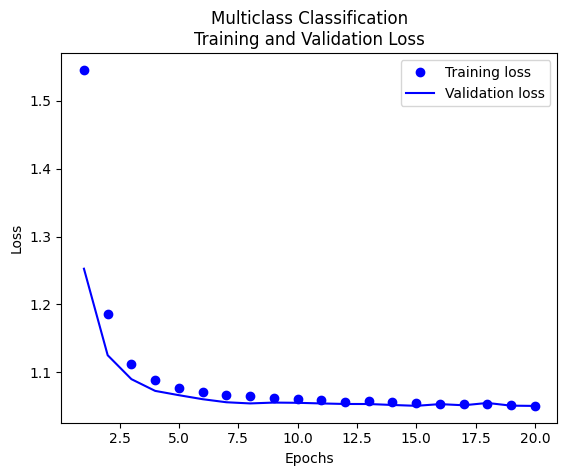

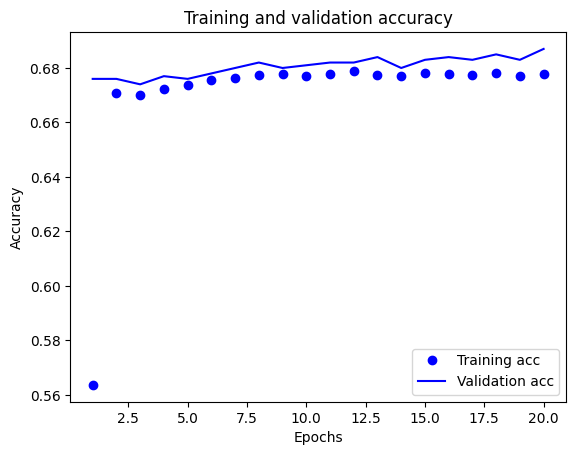

In [14]:
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Multiclass Classification\nTraining and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = 'upper right')
plt.show()

plt.clf() # Clears the figure
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [15]:
# uses 9 epochs based on the textbook example (not necessarily the optimal amount of epochs)
base = model.fit(x_train, y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))

print() # blank line for formatting
results = model.evaluate(test_data, test_label) 

# prints out the results as an array [test loss, test accuracy]
results

Epoch 1/9
12/12 [==============================] - 0s 5ms/step - loss: 1.0507 - acc: 0.6768 - val_loss: 1.0510 - val_acc: 0.6830
Epoch 2/9
12/12 [==============================] - 0s 3ms/step - loss: 1.0505 - acc: 0.6777 - val_loss: 1.0539 - val_acc: 0.6840
Epoch 3/9
12/12 [==============================] - 0s 3ms/step - loss: 1.0509 - acc: 0.6775 - val_loss: 1.0531 - val_acc: 0.6800
Epoch 4/9
12/12 [==============================] - 0s 4ms/step - loss: 1.0485 - acc: 0.6789 - val_loss: 1.0535 - val_acc: 0.6840
Epoch 5/9
12/12 [==============================] - 0s 3ms/step - loss: 1.0489 - acc: 0.6778 - val_loss: 1.0515 - val_acc: 0.6840
Epoch 6/9
12/12 [==============================] - 0s 3ms/step - loss: 1.0484 - acc: 0.6775 - val_loss: 1.0551 - val_acc: 0.6840
Epoch 7/9
12/12 [==============================] - 0s 3ms/step - loss: 1.0488 - acc: 0.6777 - val_loss: 1.0508 - val_acc: 0.6810
Epoch 8/9
12/12 [==============================] - 0s 3ms/step - loss: 1.0476 - acc: 0.6793 - val

[1.0569138526916504, 0.6689879298210144]

In [16]:
np.mean(base.history['acc']) # training accuracy 

0.6778660350375705

In [6]:
predictions = model.predict(test_data)

print(predictions[0].shape)

print(np.sum(predictions[0]))

print(np.argmax(predictions[0]))

68/68 [==============================] - 0s 515us/step
(7,)
0.99999994
5


### Further experiments

#### Experiment #6

Try using larger or smaller layers: 32 units, 128 units, and so on.

In [7]:
model1a = models.Sequential()
model1a.add(layers.Dense(32, activation='relu', input_shape=(6,)))
model1a.add(layers.Dense(32, activation='relu'))
model1a.add(layers.Dense(7, activation='softmax'))

model1a.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

history1a = model1a.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

model1a.fit(x_train, y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))
results1a = model1a.evaluate(test_data, test_label) 

Epoch 1/20
12/12 [==============================] - 0s 10ms/step - loss: 1.6639 - acc: 0.4990 - val_loss: 1.4390 - val_acc: 0.6490
Epoch 2/20
12/12 [==============================] - 0s 3ms/step - loss: 1.3559 - acc: 0.6644 - val_loss: 1.2404 - val_acc: 0.6760
Epoch 3/20
12/12 [==============================] - 0s 3ms/step - loss: 1.2151 - acc: 0.6708 - val_loss: 1.1509 - val_acc: 0.6760
Epoch 4/20
12/12 [==============================] - 0s 3ms/step - loss: 1.1530 - acc: 0.6708 - val_loss: 1.1079 - val_acc: 0.6760
Epoch 5/20
12/12 [==============================] - 0s 3ms/step - loss: 1.1235 - acc: 0.6708 - val_loss: 1.0896 - val_acc: 0.6760
Epoch 6/20
12/12 [==============================] - 0s 3ms/step - loss: 1.1060 - acc: 0.6720 - val_loss: 1.0787 - val_acc: 0.6800
Epoch 7/20
12/12 [==============================] - 0s 3ms/step - loss: 1.0955 - acc: 0.6717 - val_loss: 1.0702 - val_acc: 0.6780
Epoch 8/20
12/12 [==============================] - 0s 3ms/step - loss: 1.0880 - acc: 0.6

In [8]:
model1b = models.Sequential()
model1b.add(layers.Dense(128, activation='relu', input_shape=(6,)))
model1b.add(layers.Dense(128, activation='relu'))
model1b.add(layers.Dense(7, activation='softmax'))

model1b.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

history1b = model1b.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

model1b.fit(x_train, y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))
results1b = model1b.evaluate(test_data, test_label) 

Epoch 1/20
12/12 [==============================] - 0s 12ms/step - loss: 1.4799 - acc: 0.5929 - val_loss: 1.1346 - val_acc: 0.6760
Epoch 2/20
12/12 [==============================] - 0s 4ms/step - loss: 1.1131 - acc: 0.6711 - val_loss: 1.0695 - val_acc: 0.6740
Epoch 3/20
12/12 [==============================] - 0s 4ms/step - loss: 1.0804 - acc: 0.6752 - val_loss: 1.0645 - val_acc: 0.6780
Epoch 4/20
12/12 [==============================] - 0s 4ms/step - loss: 1.0719 - acc: 0.6738 - val_loss: 1.0582 - val_acc: 0.6800
Epoch 5/20
12/12 [==============================] - 0s 3ms/step - loss: 1.0665 - acc: 0.6756 - val_loss: 1.0735 - val_acc: 0.6720
Epoch 6/20
12/12 [==============================] - 0s 3ms/step - loss: 1.0646 - acc: 0.6740 - val_loss: 1.0574 - val_acc: 0.6840
Epoch 7/20
12/12 [==============================] - 0s 3ms/step - loss: 1.0617 - acc: 0.6756 - val_loss: 1.0532 - val_acc: 0.6810
Epoch 8/20
12/12 [==============================] - 0s 4ms/step - loss: 1.0590 - acc: 0.6

In [9]:
print("Test Results:")
print("   32 Hidden Units  =", results1a)
print("   Base (64 Units)  =", results)
print("   128 Hidden Units =", results1b)

Test Results:
   32 Hidden Units  = [1.0593963861465454, 0.670380711555481]
   Base (64 Units)  = [1.0577044486999512, 0.6694521903991699]
   128 Hidden Units = [1.0598390102386475, 0.6699164509773254]


#### Experiment #7

You used two hidden layers. Now try using a single hidden layer, or three hidden layers.

In [10]:
model2a = models.Sequential()
model2a.add(layers.Dense(64, activation='relu', input_shape=(6,)))
model2a.add(layers.Dense(7, activation='softmax'))

model2a.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

history2a = model2a.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

model2a.fit(x_train, y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))
results2a = model2a.evaluate(test_data, test_label) 

Epoch 1/20
12/12 [==============================] - 0s 11ms/step - loss: 1.9952 - acc: 0.1188 - val_loss: 1.8191 - val_acc: 0.2090
Epoch 2/20
12/12 [==============================] - 0s 3ms/step - loss: 1.7259 - acc: 0.3598 - val_loss: 1.6185 - val_acc: 0.5840
Epoch 3/20
12/12 [==============================] - 0s 3ms/step - loss: 1.5464 - acc: 0.6342 - val_loss: 1.4630 - val_acc: 0.6700
Epoch 4/20
12/12 [==============================] - 0s 3ms/step - loss: 1.4045 - acc: 0.6697 - val_loss: 1.3405 - val_acc: 0.6770
Epoch 5/20
12/12 [==============================] - 0s 3ms/step - loss: 1.2952 - acc: 0.6715 - val_loss: 1.2467 - val_acc: 0.6770
Epoch 6/20
12/12 [==============================] - 0s 3ms/step - loss: 1.2139 - acc: 0.6722 - val_loss: 1.1789 - val_acc: 0.6760
Epoch 7/20
12/12 [==============================] - 0s 3ms/step - loss: 1.1569 - acc: 0.6724 - val_loss: 1.1334 - val_acc: 0.6760
Epoch 8/20
12/12 [==============================] - 0s 3ms/step - loss: 1.1208 - acc: 0.6

In [11]:
model2b = models.Sequential()
model2b.add(layers.Dense(64, activation='relu', input_shape=(6,)))
model2b.add(layers.Dense(64, activation='relu'))
model2b.add(layers.Dense(64, activation='relu'))
model2b.add(layers.Dense(7, activation='softmax'))

model2b.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

history2b = model2b.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

model2b.fit(x_train, y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))
results2b = model2b.evaluate(test_data, test_label) 

Epoch 1/20
12/12 [==============================] - 0s 11ms/step - loss: 1.5399 - acc: 0.5966 - val_loss: 1.1857 - val_acc: 0.6760
Epoch 2/20
12/12 [==============================] - 0s 3ms/step - loss: 1.1385 - acc: 0.6708 - val_loss: 1.0748 - val_acc: 0.6770
Epoch 3/20
12/12 [==============================] - 0s 3ms/step - loss: 1.0855 - acc: 0.6734 - val_loss: 1.0681 - val_acc: 0.6790
Epoch 4/20
12/12 [==============================] - 0s 3ms/step - loss: 1.0752 - acc: 0.6750 - val_loss: 1.0563 - val_acc: 0.6830
Epoch 5/20
12/12 [==============================] - 0s 3ms/step - loss: 1.0700 - acc: 0.6752 - val_loss: 1.0525 - val_acc: 0.6820
Epoch 6/20
12/12 [==============================] - 0s 3ms/step - loss: 1.0660 - acc: 0.6770 - val_loss: 1.0565 - val_acc: 0.6850
Epoch 7/20
12/12 [==============================] - 0s 3ms/step - loss: 1.0622 - acc: 0.6770 - val_loss: 1.0750 - val_acc: 0.6810
Epoch 8/20
12/12 [==============================] - 0s 3ms/step - loss: 1.0621 - acc: 0.6

In [12]:
print("Test Results:")
print("   1 Hidden Layer  =", results2a)
print("   Base (2 Layers) =", results)
print("   3 Hidden Layers =", results2b)

Test Results:
   1 Hidden Layer  = [1.0665624141693115, 0.6671309471130371]
   Base (2 Layers) = [1.0577044486999512, 0.6694521903991699]
   3 Hidden Layers = [1.067157506942749, 0.6727019548416138]
